In [1]:
!pip list

Package             Version
------------------- --------
argon2-cffi         20.1.0
async-generator     1.10
attrs               21.2.0
backcall            0.2.0
bleach              3.3.0
cffi                1.14.5
cycler              0.10.0
decorator           5.0.9
defusedxml          0.7.1
dill                0.3.4
easydict            1.9
entrypoints         0.3
ipykernel           5.5.5
ipython             7.24.1
ipython-genutils    0.2.0
ipywidgets          7.6.3
jedi                0.18.0
Jinja2              3.0.1
jsonschema          3.2.0
jupyter             1.0.0
jupyter-client      6.1.12
jupyter-console     6.4.0
jupyter-core        4.7.1
jupyterlab-pygments 0.1.2
jupyterlab-widgets  1.0.0
kiwisolver          1.3.1
lab                 6.3
MarkupSafe          2.0.1
matplotlib          3.4.2
matplotlib-inline   0.1.2
mistune             0.8.4
nbclient            0.5.3
nbconvert           6.0.7
nbformat            5.1.3
nest-asyncio        1.5.1
notebook            6.4.0
numpy  

In [4]:
from pytorch_examples.examples.fast_neural_style.neural_style.vgg import Vgg16
from pytorch_examples.examples.fast_neural_style.neural_style.transformer_net import TransformerNet
import torch
import re
import cv2
from pytorch_examples.examples.fast_neural_style.neural_style import utils
import torch
from torch.optim import Adam
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms

import cv2
import matplotlib.pyplot as plt


In [10]:
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams['figure.dpi'] = 150 # 200 e.g. is really fine, but slower


In [5]:
device = torch.device( "cuda" )
# Loads pre-trained weights
rain_princess_path = './saved_models/rain_princess.pth'
candy_path = './saved_models/candy.pth'
mosaic_path = './saved_models/mosaic.pth'
udnie_path = './saved_models/udnie.pth'

# Loads the pre-trained weights into the fast neural style transfer
# network architecture and puts the network on the Cloud TPU core.
def load_style(path):
  with torch.no_grad():
    model = TransformerNet()
    state_dict = torch.load(path)
    # filters deprecated running_* keys from the checkpoint
    for k in list(state_dict.keys()):
        if re.search(r'in\d+\.running_(mean|var)$', k):
            del state_dict[k]
    model.load_state_dict(state_dict)
    return model.to(device)

# Creates each fast neural style transfer network
rain_princess = load_style(rain_princess_path)
candy = load_style(candy_path)
mosaic = load_style(mosaic_path)
udnie = load_style(udnie_path)

--2021-07-11 17:11:42--  https://i.imgur.com/d5DZl99.png
Resolving i.imgur.com (i.imgur.com)... 151.101.136.193
Connecting to i.imgur.com (i.imgur.com)|151.101.136.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 364945 (356K) [image/png]
Saving to: ‘content.jpg’

content.jpg         100%[===================>] 356.39K  --.-KB/s    in 0.02s   

2021-07-11 17:11:42 (14.0 MB/s) - ‘content.jpg’ saved [364945/364945]



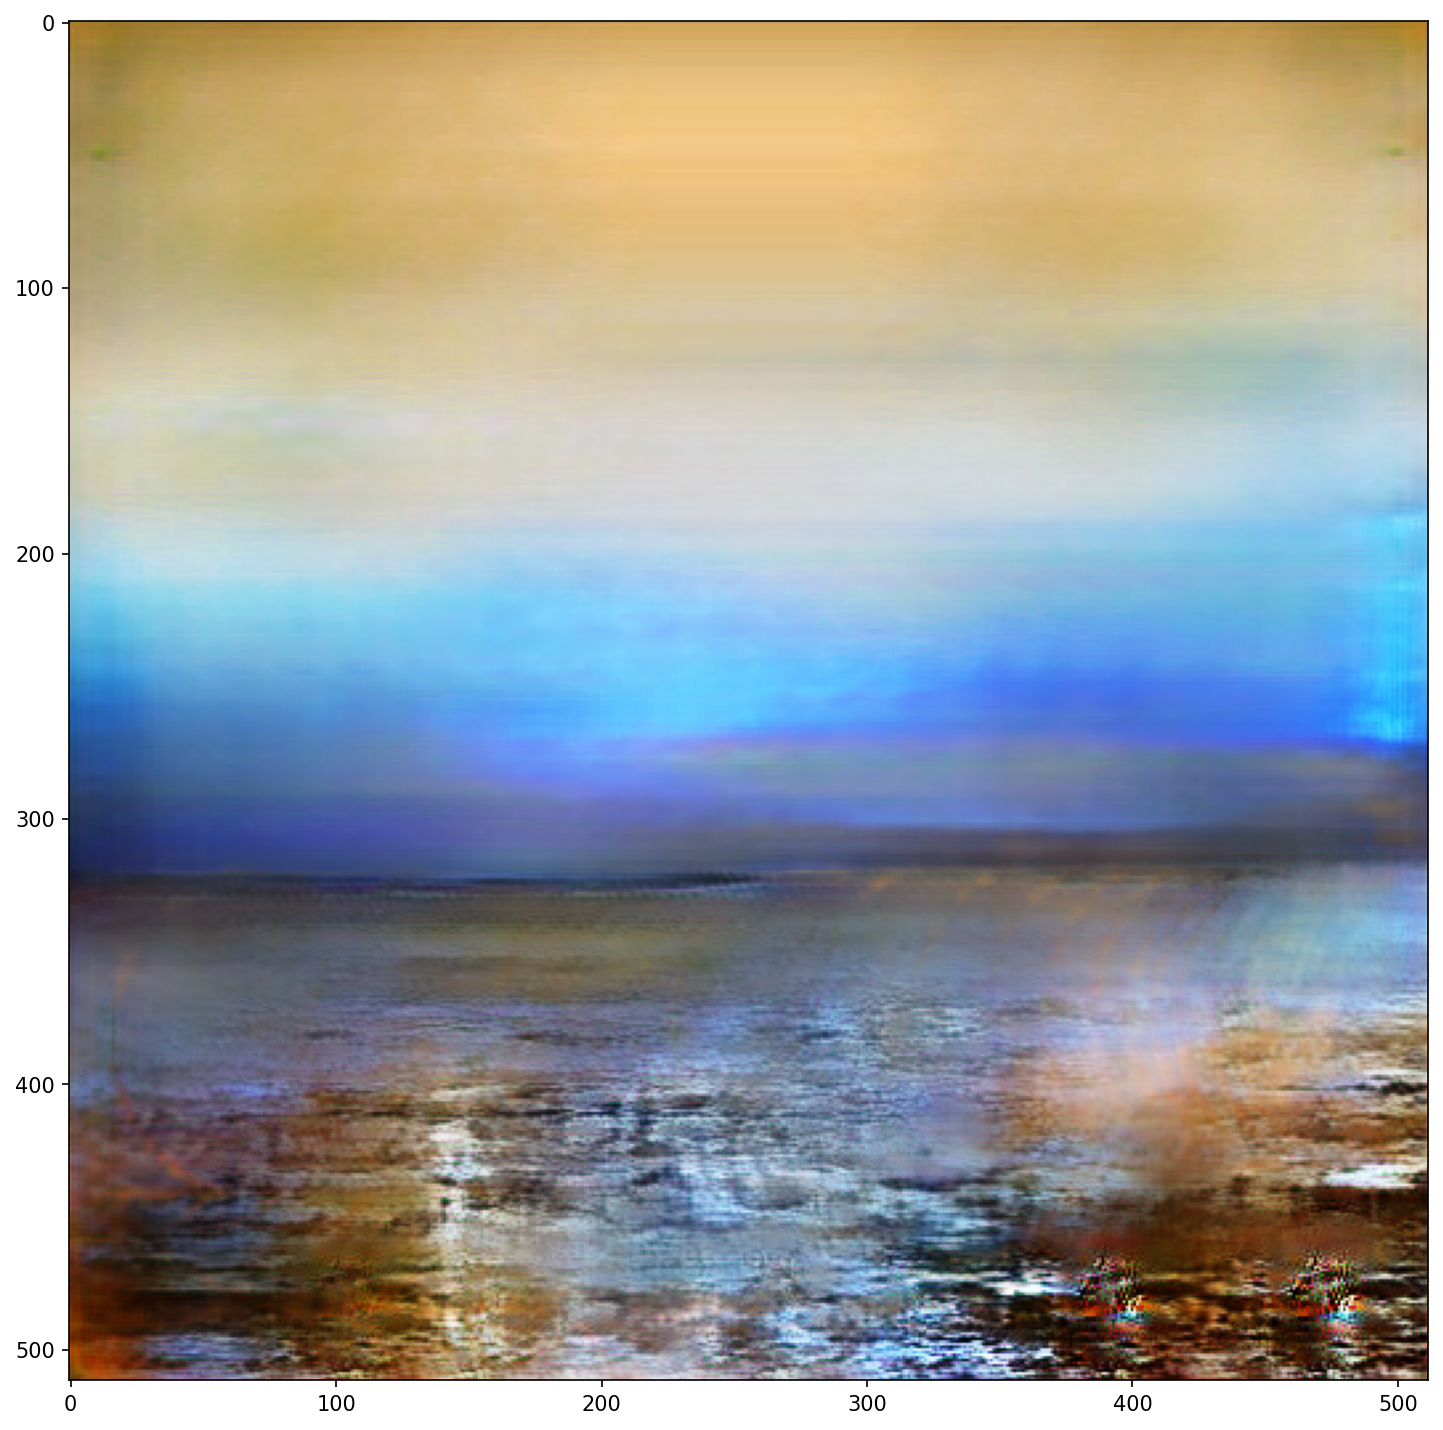

In [11]:
#@markdown ### Image URL (right click -> copy image address):
content_image_url = 'https://i.imgur.com/d5DZl99.png' #@param {type:"string"}
content_image = 'content.jpg'
!wget -O "$content_image" "$content_image_url"
RESULT_IMAGE = '/tmp/result.jpg'
!rm -f "$RESULT_IMAGE"
img = cv2.imread(content_image, cv2.IMREAD_UNCHANGED)

content_image = utils.load_image(content_image, scale=None)
content_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Lambda(lambda x: x.mul(255))
    ])
content_image = content_transform(content_image)
content_image = content_image.unsqueeze(0).to(device)


window_name = 'image'

plt.imshow(img)
plt.show()




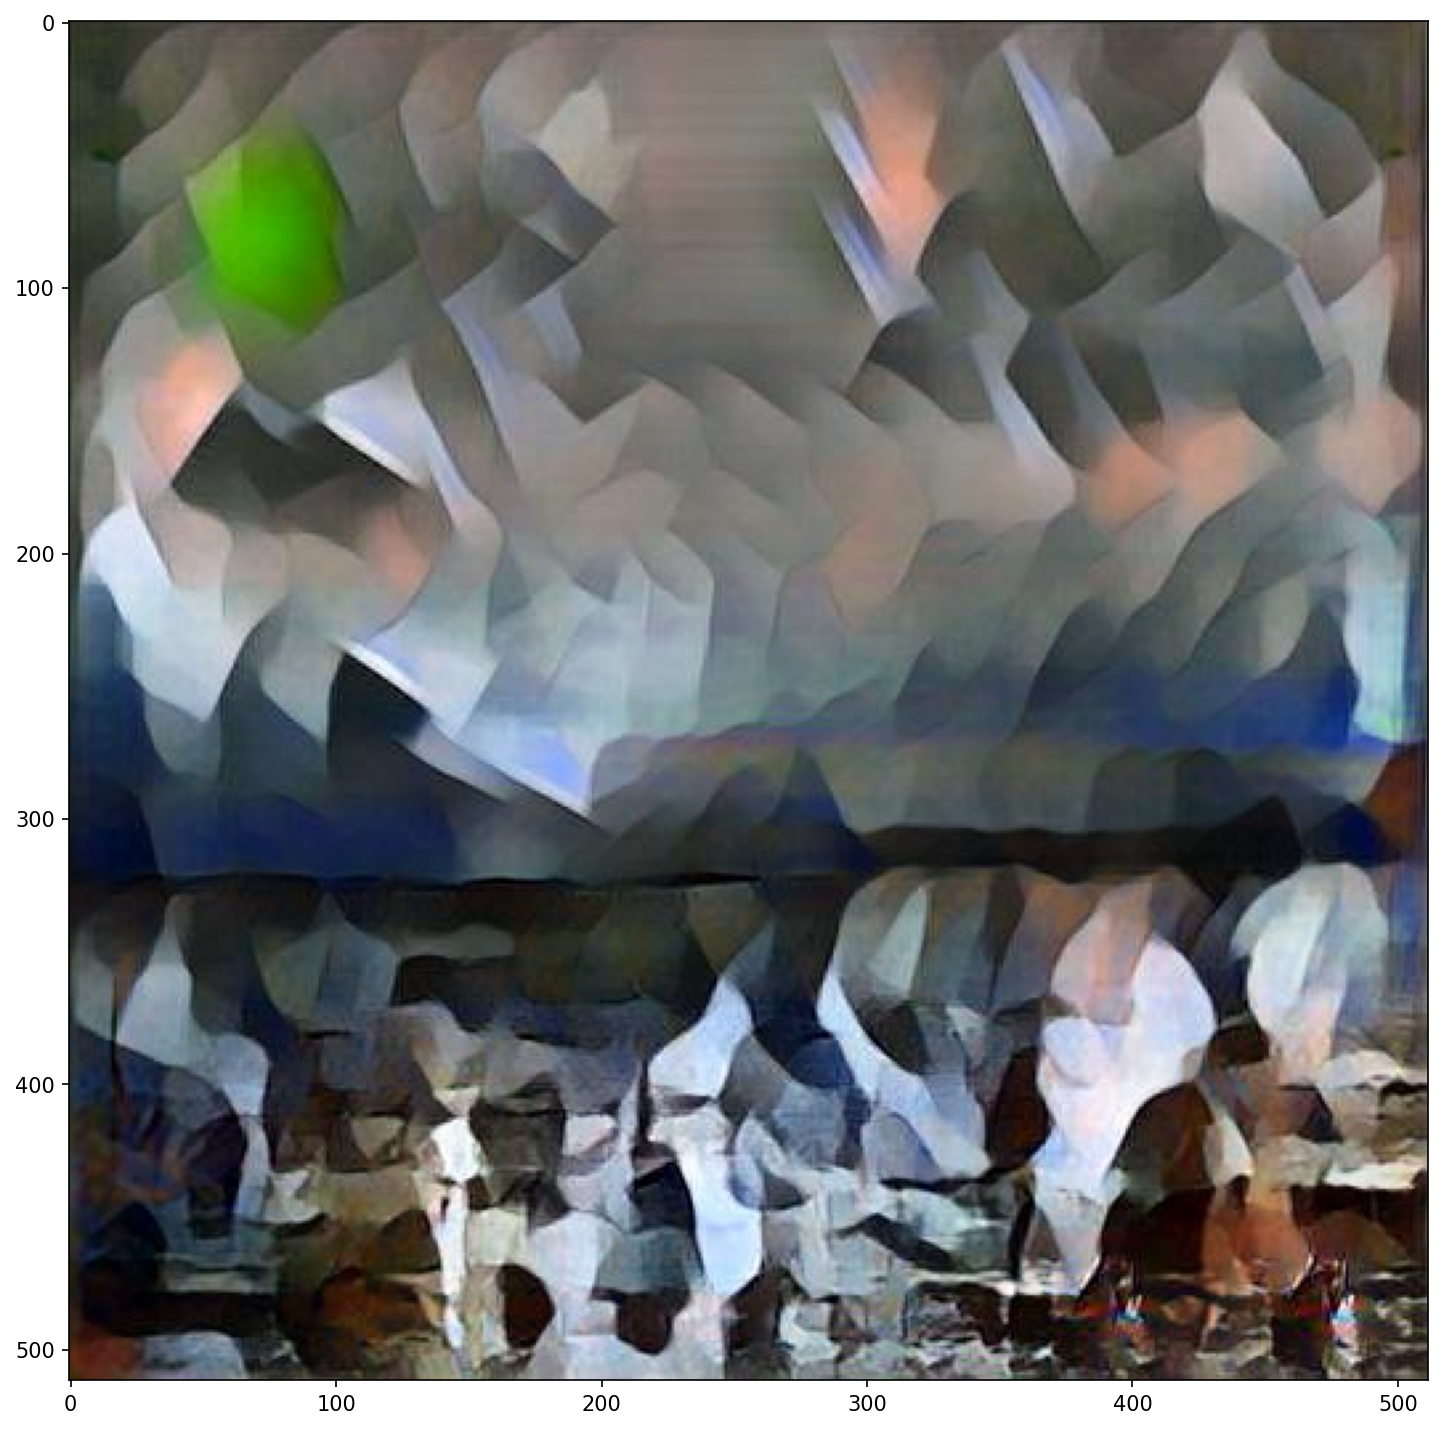

In [15]:
with torch.no_grad():
#   output = rain_princess(content_image)
#   output = candy(content_image)
#   output = mosaic(content_image)
  output = udnie(content_image)


utils.save_image(RESULT_IMAGE, output[0].cpu())
img = cv2.imread(RESULT_IMAGE, cv2.IMREAD_UNCHANGED)
plt.imshow(img,cmap='gray')
plt.show()
